In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats

In [2]:
#Loading the data
data = pd.read_csv('Files/diabetes.csv')

**Some information about the dataset**
----
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
- The objective of the dataset is to diagnostically predict whether a patient has diabetes,  based on certain diagnostic measurements included in the dataset. 
- all patients here are females 
- at least 21 years old of Pima Indian heritage.
----
(Since we're dealing with individuals at least 21 years old, this dataset is more likely about type 2 diabetes than type 1, since type 1 typically in childhood or adolescence.)

## EDA (Exploratory Data Analysis) :

In [3]:
data.shape

(768, 9)

We have 768 rows and 9 columns

In [4]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#check basic information about the dataset, dtypes and non null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- There dont seem to be null values.
- We have 2 types of variables : integers and float.

In [6]:
#Confirm the absence of null values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Check if there are duplicated values
data.duplicated().sum()

0

In [8]:
#Check basic statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The dataset exhibits a minimum value of **zero** for vital parameters including **Glucose, Blood Pressure, Insulin, BMI, and Skin Thickness**. Given the fundamental nature of these physiological measures, a value of zero is inherently implausible. 

- It is plausible to hypothesize that these zero values may have been erroneously recorded as placeholders for missing or unknown data points.

- In particular, for the variables Insulin and Skin Thickness, an alternative hypothesis would be that the recorded zeros might represent extremely small values that were approximated as zero during data entry. 

In [9]:
#Getting the columns names
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

So these are the features we have (independent variables) that would participate in prediciting the outcome (diabetic or not):

- Pregnancies: Number of pregnancies.
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- BMI: Body mass index (weight in kg/(height in m)2)
- DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- Age: Age (years).

The dependant variable :
- Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

(These informations are taken from : https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16 )

### **Insulin** 
In constructing the predictive model for diabetes, i am going to exclude insulin as a predictive variable.

Insulin is going to be an **intermediate factor** in the model : the variations in insulin levels are more of a **consequence** of diabetes (outcome variable) rather than a direct cause of the condition.

By omitting insulin from the model, i aim to prevent potential bias and ensure the model's focus on factors more directly related to the onset and progression of diabetes. 
This approach helps maintain the model's robustness by prioritizing predictors that have a more causal relationship with the condition.

In [10]:
#Dropping the insulin column
data = data.drop(columns='Insulin')

* It would be interesting to check the distribution of diabetic status in this dataset by visualising how many diabetic and non diabetic it contains.

In [11]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

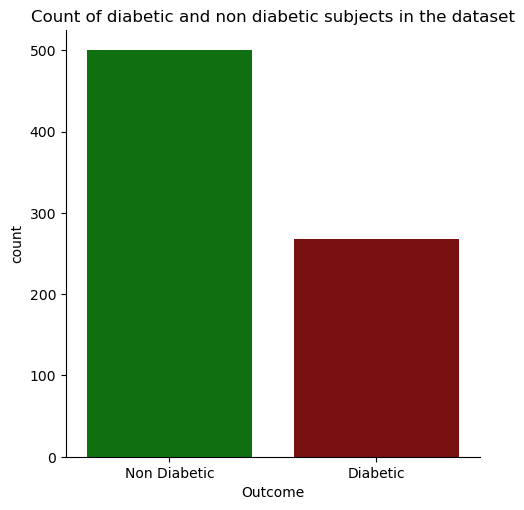

In [12]:
#since a visualisation is always useful :
c =['green','darkred']
fig = sns.catplot(data=data, x="Outcome", kind="count",palette=c)
fig.set_xticklabels(['Non Diabetic', 'Diabetic'])
fig.tight_layout()
plt.title('Count of diabetic and non diabetic subjects in the dataset',size=12)
plt.show()

* There seems to be more non diabetic (500) than diabetic (268) subjects in the dataset

* Let's compare the different values of the features in the two groups as well as their density:

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

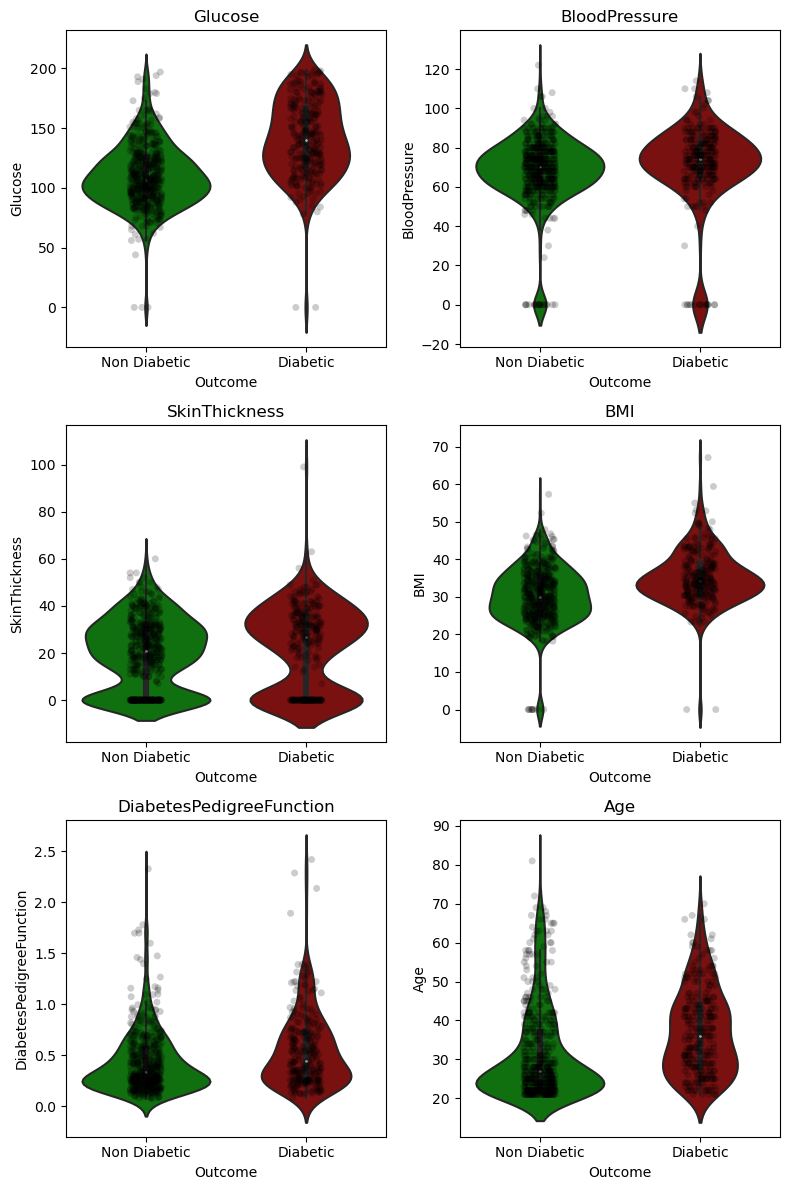

In [14]:
data_columns = data.columns[1:7] 
num_columns = len(data_columns)
num_rows = (num_columns + 1) // 2 

fig, axes = plt.subplots(num_rows, 2, figsize=(8, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(data_columns):
    sns.violinplot(data=data, x="Outcome", y=column, ax=axes[i], palette=c,alpha=0.7, showmedians=True)
    sns.stripplot(data=data, x="Outcome", y=column, ax=axes[i], jitter=True, color="black",alpha=0.2)
    axes[i].set_title(f'{column}')
    axes[i].set_ylabel(column)
    axes[i].set_xticklabels(['Non Diabetic', 'Diabetic'])

plt.tight_layout()
plt.show()

* The skinthickness of the diabetic group has an outlier of 100mm, this value seems very unlikely.
* The BMI also has some very high values

Let's check the percentage of the values of 0 in the different features :

In [15]:
zero_values_cols =['BloodPressure','Glucose','BMI','SkinThickness']

In [16]:
for column in zero_values_cols:
    zero_proportion = data[column].eq(0).mean()
    print(f"{column}: {zero_proportion:.2%}")

BloodPressure: 4.56%
Glucose: 0.65%
BMI: 1.43%
SkinThickness: 29.56%


* It appears that the "SkinThickness" column has a relatively high proportion of zero values (29.56%)
* There's one particularly high outlier in the 'SkinThickness' column (approximately 100mm) that should be removed from the dataset (checked this article about the Evaluation of skin and subcutaneous tissue thickness at insulin injection sites in Indian, insulin naïve, type-2 diabetic adult population https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3784870/ to have a better idea about the range of skin thickness), and since it is only one value it wont really impact the dataset.

For these features : 'BloodPressure','Glucose','BMI','SkinThickness' , replacing the zeros with the mean seems like a good option (same thing was done in this paper : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10107388/ )

In [17]:
#saving the original data in a copy before i apply modifications
data_copy = data

In [18]:
data[data['SkinThickness'] > 90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,34.7,0.575,62,1


In [19]:
data = data.drop(data[data['SkinThickness'] > 90].index, axis=0)

In [20]:
data[data['SkinThickness'] > 90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome


In [21]:
SkinThickness_mean = data['SkinThickness'][data['SkinThickness'] != 0].mean()
glucose_mean = data['Glucose'][data['Glucose'] != 0].mean()
bp_mean = data['BloodPressure'][data['BloodPressure'] != 0].mean()
bmi_mean = data['BMI'][data['BMI'] != 0 ].mean()
data['SkinThickness'] = data['SkinThickness'].replace(0,SkinThickness_mean)
data['Glucose'] = data['Glucose'].replace(0,glucose_mean)
data['BloodPressure'] = data['BloodPressure'].replace(0,bp_mean)
data['BMI'] = data['BMI'].replace(0,bmi_mean)

In [22]:
#Checking those values have been correctly handled
for column in zero_values_cols:
    zero_proportion = data[column].eq(0).mean()
    print(f"{column}: {zero_proportion:.2%}")

BloodPressure: 0.00%
Glucose: 0.00%
BMI: 0.00%
SkinThickness: 0.00%


## Correlations :

* Let's proceed with checking how the data is correlated in the dataset :

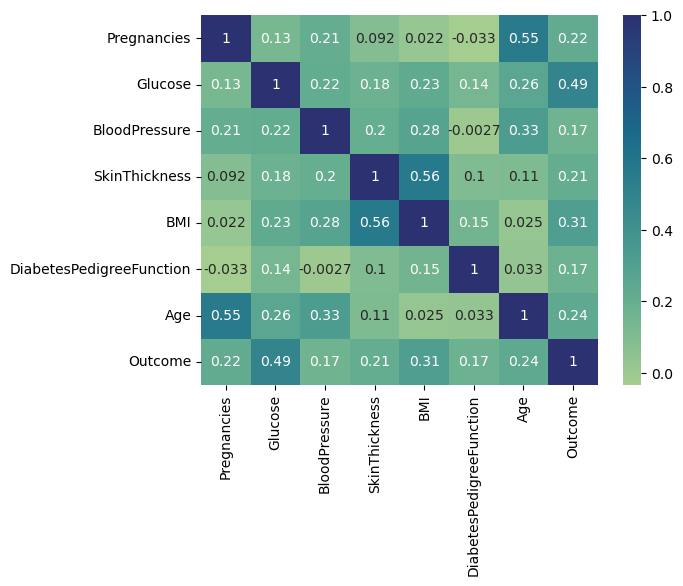

In [23]:
sns.heatmap(data.corr(),cmap='crest',annot=True)
plt.show()

- Darker colors on the heatmap indicate a higher degree of correlation, approaching a value of 1.
- Analysis of the heatmap reveals noteworthy correlations between glucose levels, age, BMI, and the number of pregnancies with the outcome variable. 
- Additionally, there are correlations between pairs of features such as age and pregnancies, blood pressure and age, as well as BMI and skin thickness.
- It is important to check the presence of multicollinearity, which may require careful interpretation of results after using these variables. For now we dont seem to have a severe correlation.

<Figure size 800x800 with 0 Axes>

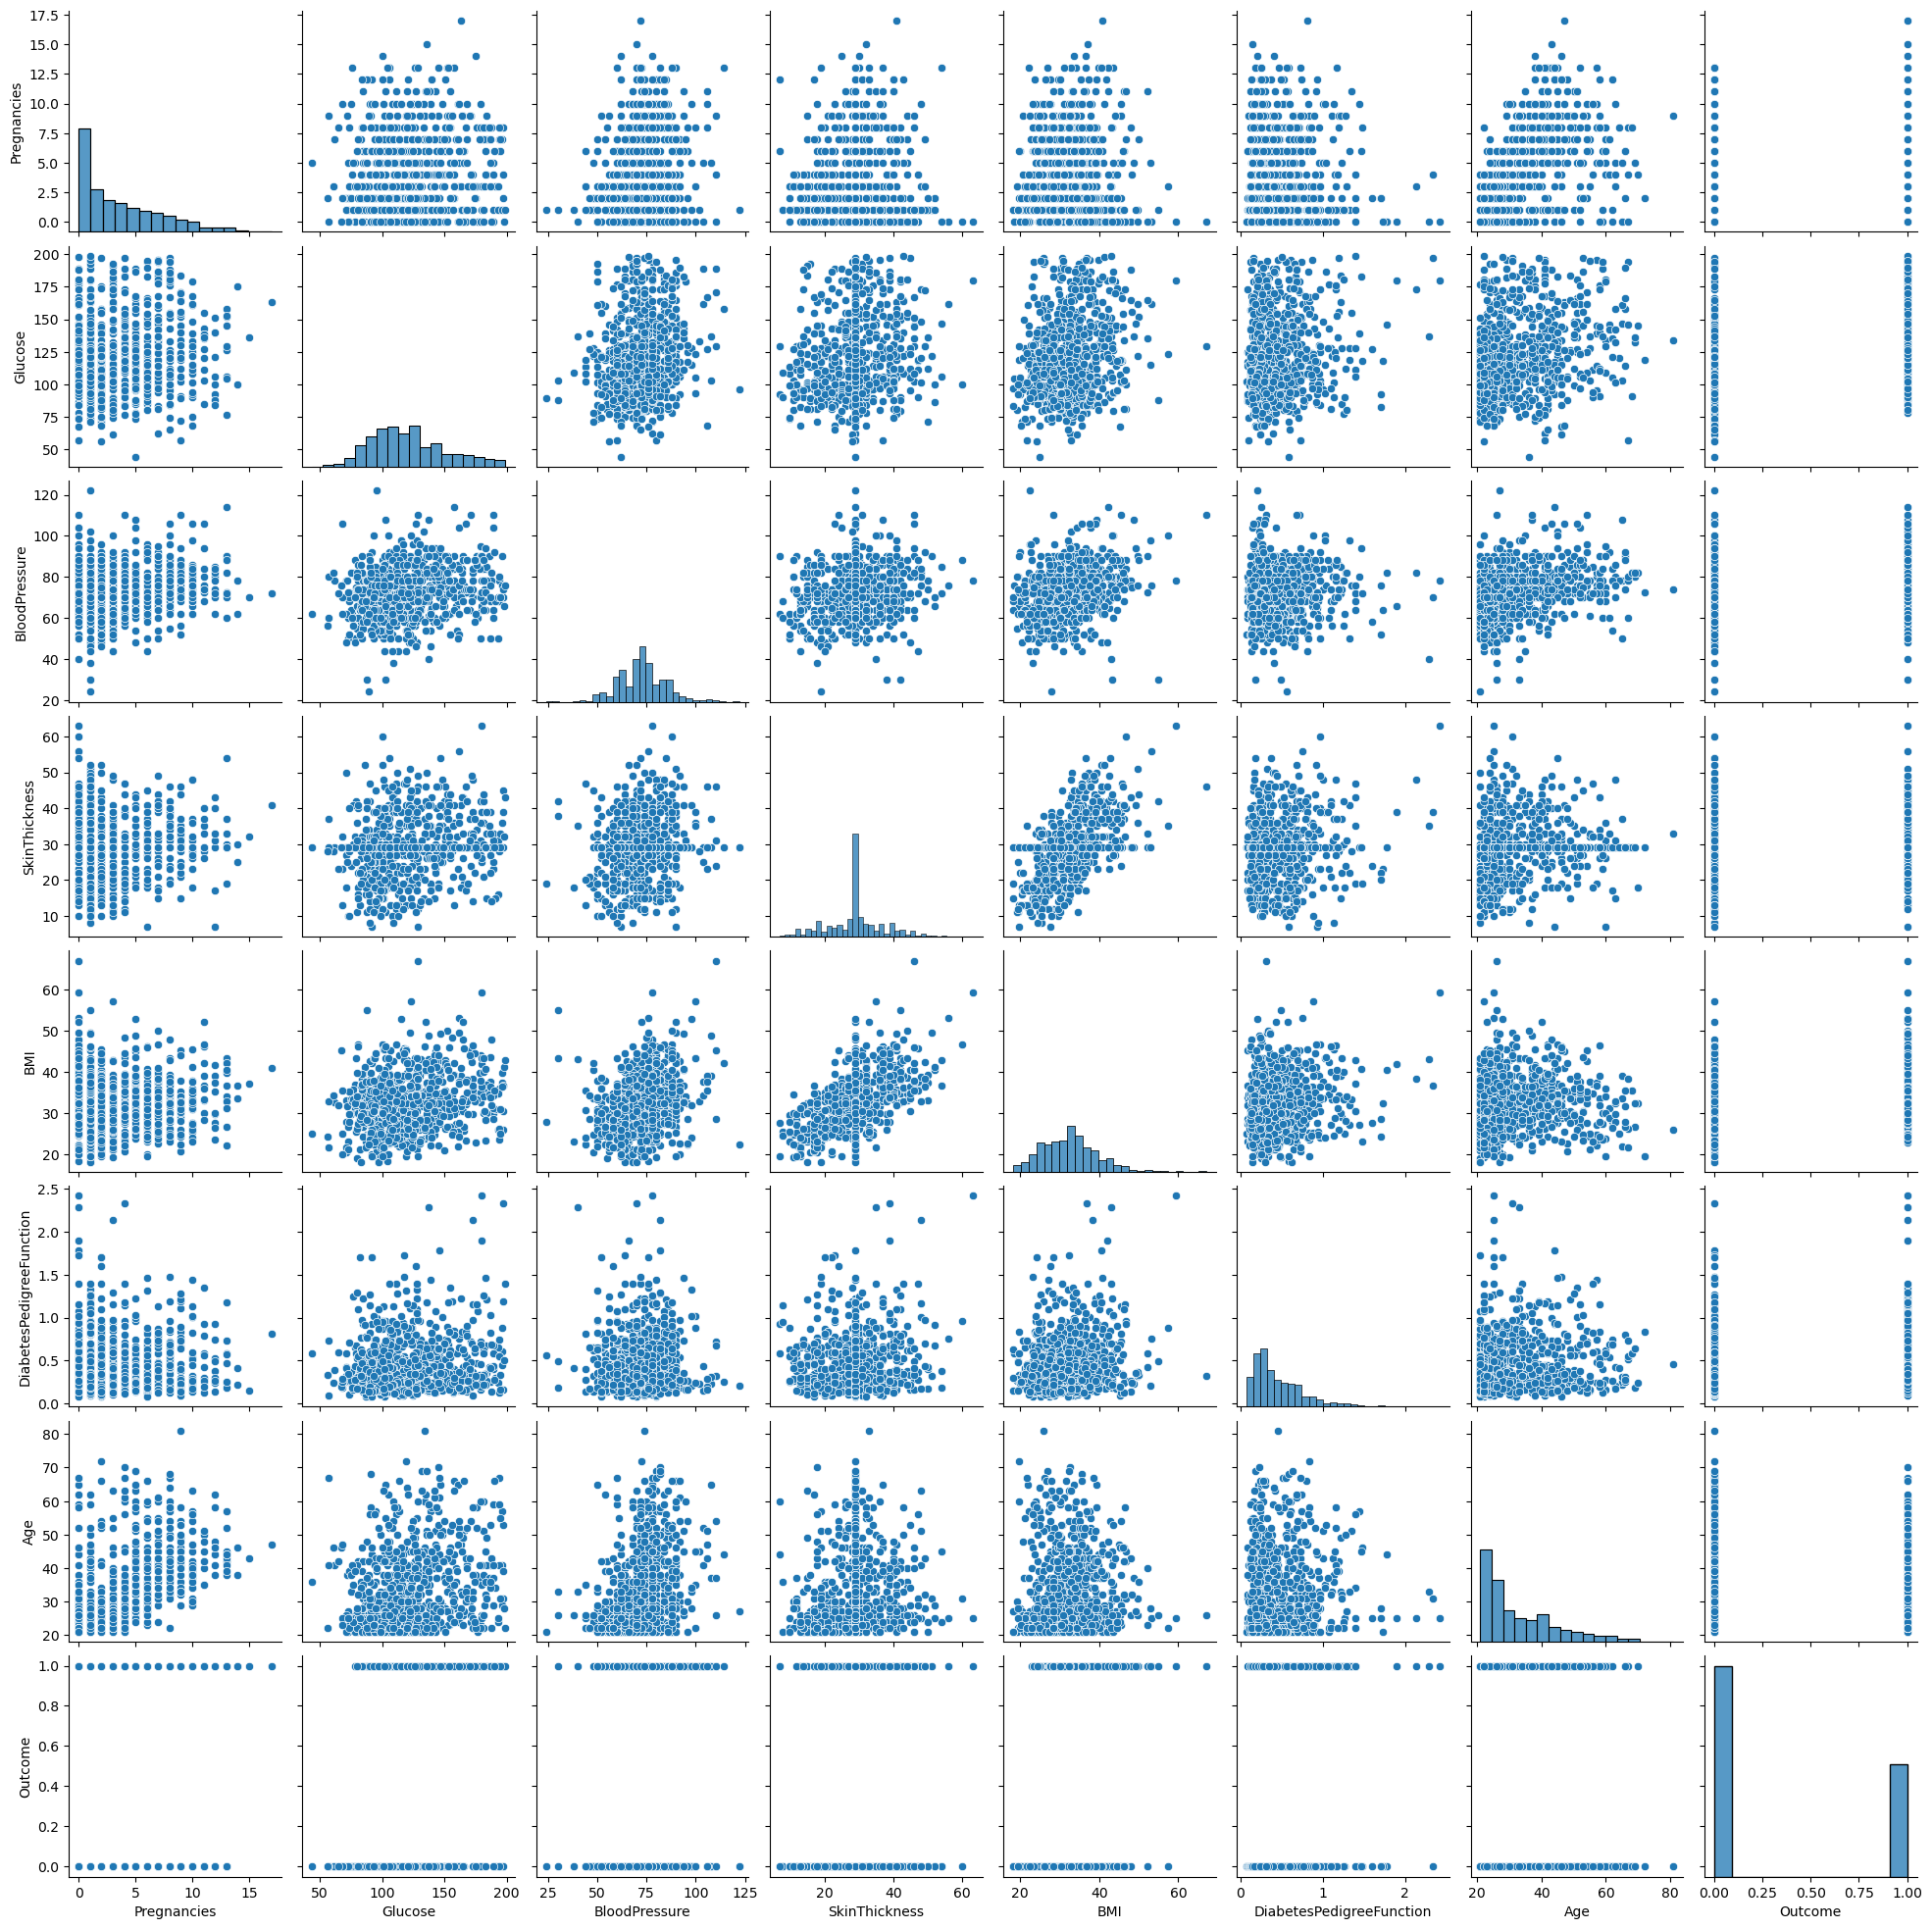

In [24]:
#additional check for a linear relationship between the variables
plt.figure(figsize=(8,8))
sns.pairplot(data)
plt.show()

## Let's proceed with the most important features

In [25]:
data = data[['Pregnancies','Glucose','BMI','Age','Outcome']]

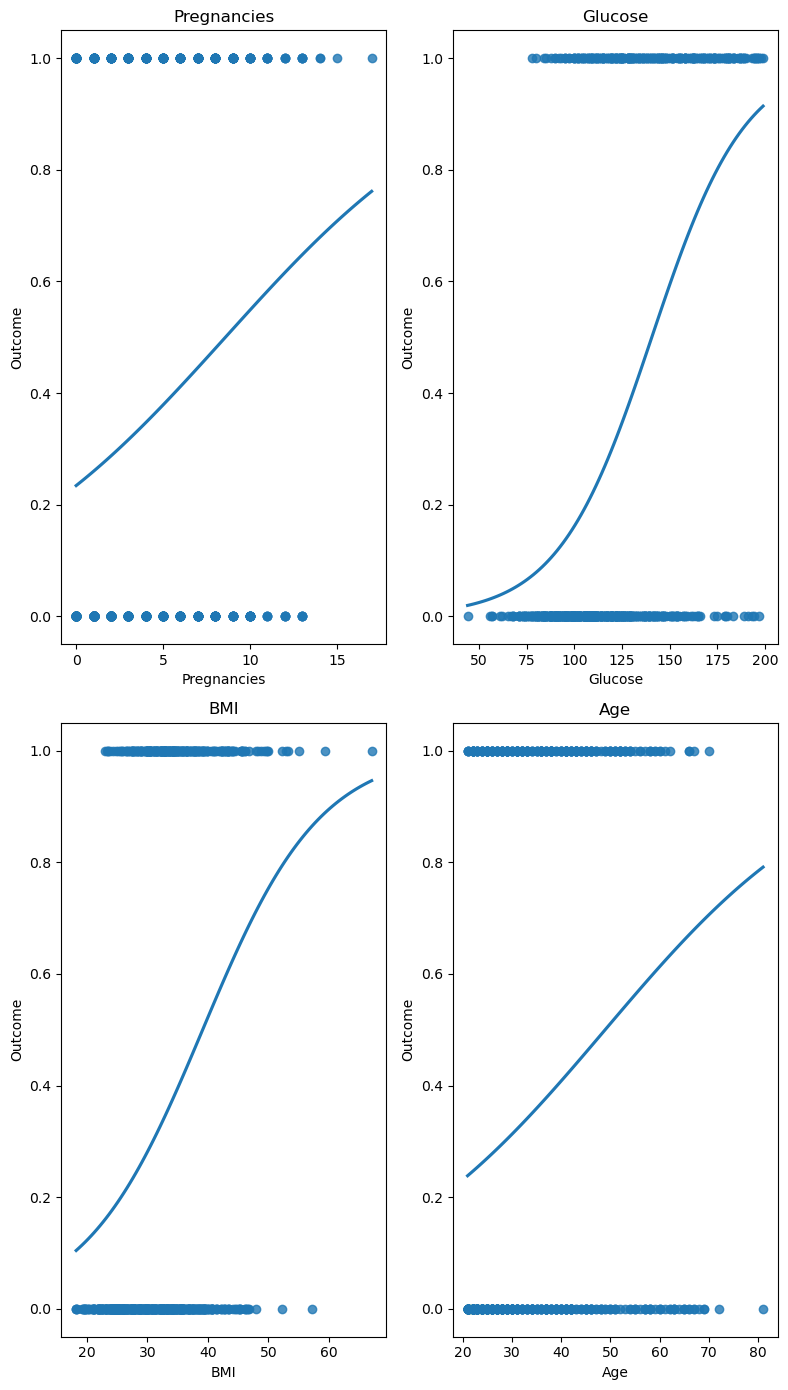

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(8, 14))
axes = axes.flatten()

for i, column in enumerate(data.columns[:-1]) :
    sns.regplot(x=column, y="Outcome", data=data, logistic=True,ax=axes[i],ci=False)
    axes[i].set_title(f'{column}')
    
plt.tight_layout()
plt.show()

In a logistic regression plot, you would ideally want to see a clear S-shaped curve, indicating that changes in the predictor variables are associated with changes in the probability of the outcome being in a specific category.

In our case the perfect S shape corresponds to BMI and Glucose.

## Binomial logistic regression model

In [27]:
X = data.drop(['Outcome'],axis = 1)
y = data['Outcome']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [29]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(513, 4) (254, 4) (513,) (254,)


## Dataset normalisation : 

### Normalizing the training set

In [30]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train_norm = (X_train - means)/stds
X_train_norm = (X_train - means)/stds
print('----------\nTrain dataset mean:\n----------\n',np.mean(X_train_norm, axis=0))
print('----------\nTrain standard deviation:\n----------\n',np.std(X_train_norm, axis=0))

----------
Train dataset mean:
----------
 Pregnancies    8.656710e-19
Glucose        1.694821e-16
BMI           -1.965073e-16
Age            1.177313e-16
dtype: float64
----------
Train standard deviation:
----------
 Pregnancies    1.0
Glucose        1.0
BMI            1.0
Age            1.0
dtype: float64


### Normalizing the testing set

In [31]:
X_test_norm = ( X_test - X_test.mean()) / X_test.std()
print('----------\nTest dataset mean:\n----------\n',np.mean(X_test_norm, axis=0)) 
print('----------\nTest dataset sd:\n----------\n',np.std(X_test_norm, axis=0))

----------
Test dataset mean:
----------
 Pregnancies    2.098059e-17
Glucose        2.334091e-16
BMI            1.328771e-16
Age           -1.516722e-16
dtype: float64
----------
Test dataset sd:
----------
 Pregnancies    0.99803
Glucose        0.99803
BMI            0.99803
Age            0.99803
dtype: float64


The means are close to zero and the standard deviation is close to 1 so we can proceed with our normalized datasets.

## Model building

In [32]:
clf = LogisticRegression()

## Model training

In [33]:
clf.fit(X_train_norm,y_train)

LogisticRegression()

## Model evaluation

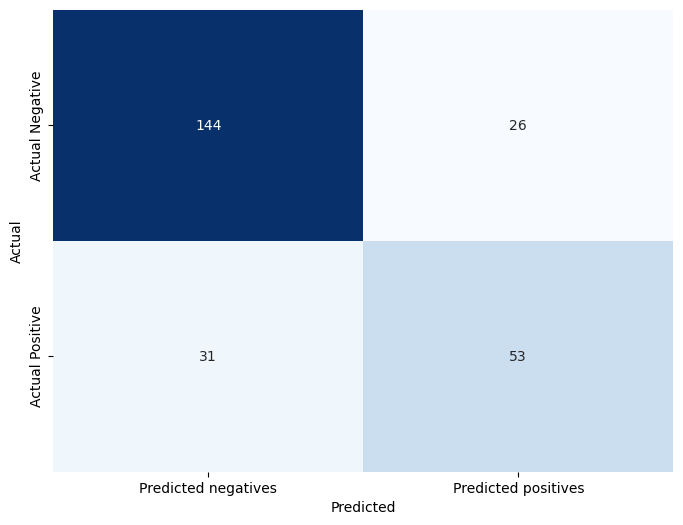

In [34]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test_norm)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
labels = ['Actual Negative', 'Actual Positive']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted negatives','Predicted positives'], yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [35]:
print('Classification Metrics:')
print('----------------------')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
print(f'Recall (Sensitivity): {recall_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred):.2f}')

Classification Metrics:
----------------------
Accuracy: 0.78
F1 Score: 0.65
Recall (Sensitivity): 0.63
Precision: 0.67


In [36]:
from sklearn.metrics import classification_report
target_labels = ["diabetic", "not diabetic"]
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    diabetic       0.82      0.85      0.83       170
not diabetic       0.67      0.63      0.65        84

    accuracy                           0.78       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.77      0.78      0.77       254



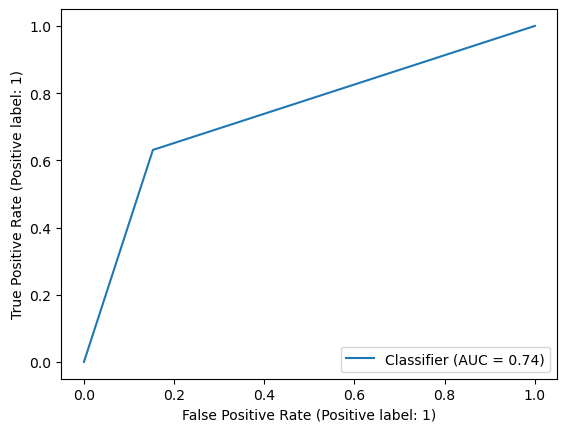

In [37]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

## Model results interpretation :

**Precision:**

Precision for "diabetic" class: 0.82
Precision for "not diabetic" class: 0.68
Precision measures the accuracy of the positive predictions made by the model. 
- For the "diabetic" class, it means that out of all the instances predicted as "diabetic" : 82% were actually diabetic. 
- For the "not diabetic" class, it means that out of all the instances predicted as "not diabetic", 67% were actually not diabetic.

**Recall:**

Recall for "diabetic" class: 0.85
Recall for "not diabetic" class: 0.63
Recall measures the ability of the model to correctly identify all positive instances. 
- For the "diabetic" class, it means that out of all the actual diabetic instances: 85% were correctly identified. 
- For the "not diabetic" class, it means that out of all the actual not diabetic instances, 63% were correctly identified.

**F1-Score:**

- F1-Score for "diabetic" class: 0.84
- F1-Score for "not diabetic" class: 0.65
The F1-Score is the harmonic mean of precision and recall. 
A high F1-Score indicates a good balance between precision and recall.

**AUC** :

The AUC metric quantifies the overall ability of the model to discriminate between positive and negative classes. 

An AUC smaller than 0.5 indicates that the model performs worse than a random classifier, and an AUC larger than 0.5 indicates that the model performs better than a random classifier.

An AUC of 0.74 indicates a reasonable level of discrimination.

**Support:**

Support for "diabetic" class: 170
Support for "not diabetic" class: 84
The support is the number of occurrences of each class in the actual dataset.

**In conclusion** :

The model performs reasonably well, with higher precision and recall for the "diabetic" class compared to the "not diabetic" class. 

## Let's look at the coefficients of the different features :

In [38]:
coefs = clf.coef_[0]

result = pd.DataFrame({'Feature' : clf.feature_names_in_,'coef':coefs})
result

,Feature,coef
0,Pregnancies,0.363265
1,Glucose,1.080938
2,BMI,0.744809
3,Age,0.239035


## Coefficients visualisation

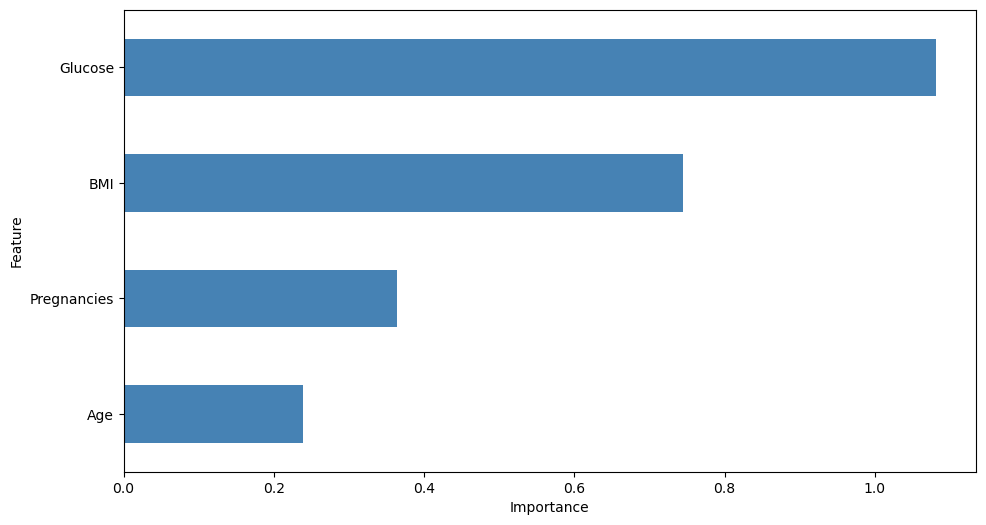

In [39]:
fig = plt.figure(figsize=(8,12))
result.sort_values(by=['coef'], ascending=True, inplace=True)
result.coef.plot(kind='barh', figsize=(11, 6), color=['red' if x < 0 else 'steelblue' for x in result['coef']])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.yticks(range(len(result['Feature'])), result['Feature'])
plt.show()

## Coefficient interpretation

**Glucose:**

For every one-unit increase in glucose level, the log odds of the person being diabetic (as opposed to not being diabetic) increases by a factor of about 2.085:

exp(1.080938) ≈ 2.943

Percentage Increase = (Odds Ratio − 1) * 100 = (2.943 − 1) * 100

Percentage Increase ≈ 194.3%

A one-unit increase in glucose level is associated with a 194.3% increase in the odds of the person being diabetic compared to not being diabetic.

**Pregnancies:**

For every one-unit increase in pregnancies, the log odds of the person being diabetic increases by:

exp(0.363265) ≈ 1.438

Percentage Increase: (1 - Odds Ratio) * 100 = (1.438 - 1) * 100 = 43.8%

which means that for every unit increase in pregnancies, there's an increase of approximately 43.8% in the odds of the person being diabetic compared to not being diabetic.

**BMI:**

For every one-unit increase in BMI, the log odds of the person being diabetic (as opposed to not being diabetic) increases by a factor of about 2.125:

exp(0.744809) ≈ 2.107

Percentage Increase = (Odds Ratio − 1) * 100 = (2.107 − 1) * 100 ≈ 110.7%

A one-unit increase in BMI is associated with a 110.7% increase in the odds of the person being diabetic compared to not being diabetic.

**Age:**

For every one-year increase in age, the log odds of the person being diabetic (as opposed to not being diabetic) increases by a factor of about 1.269:

exp(0.239035) ≈ 1.270

Percentage Increase = (Odds Ratio − 1) * 100 = (1.270 − 1) * 100 ≈ 27.0%

A one-year increase in age is associated with a 27.0% increase in the odds of the person being diabetic compared to not being diabetic.

## Conclusion :
The analysis identifies key factors significantly associated with the likelihood of diabetes. Glucose levels and BMI exhibit notable impacts on the odds of being diabetic, as well as age and pregnancies. 

The observations align with widely accepted diabetes risk factors, as outlined by sources such as the CDC's guidelines on diabetes risk factors (https://www.cdc.gov/diabetes/basics/risk-factors.html)